This Notebook serves to evaluate the raw dataset.

In [1]:
import numpy as np
import pandas as pd
import imageio
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from os.path import basename

In [20]:
"""
Data analyse
input
    path: Path to the raw dataset
    name: Name of the subset
"""
def evaluateDataset(path, name):

    print('%s DATA OVERVIEW' % name)
    
    classes = {}

    for filename in Path(path).glob("*/"):

        classImgCounter = 0

        for file in (Path(path) / basename(filename)).glob("**/*.jpg"):
            classImgCounter += 1

        classes[filename.name] = classImgCounter
    
    visualizeImageDistribution(classes)
    showStats(classes)
    analyzeWithPandas(classes)

    #for name, number in classes.items():
        #print('%s: %d' % (name, number))

In [21]:
"""
Visualize the image distribution in the classes
input
    classes: Dictionary with name/image number pairs
"""
def visualizeImageDistribution(classes):

    f, ax = plt.subplots(1)

    totalClasses = (len(classes))
    # Compute the x and y coordinates
    x = np.arange(0, totalClasses, 1)
    y = ([])

    for key, value in classes.items():
        y = np.append(y, value)

    # Plot the points using matplotlib
    ax.plot(x, y)
    ax.set_ylim(ymin=0)
    plt.title('Distribution of images')
    plt.xlabel('Class index')
    plt.ylabel('#images in class')
    plt.show(f)  # call plt.show() to make graphics appear
    print('---')

In [22]:
"""
Show statistics of the classes
input
    classes: Dictionary with name/image number pairs
"""
def showStats(classes):
    
    totalClasses = (len(classes))
    totalImages = 0
    
    for images in classes.values(): 
        totalImages += images
    
    values = ([])
    for key, value in classes.items():
        values = np.append(values, value)
    
    print('# images: %d' % totalImages)
    print('# classes: %d' % totalClasses)
    print('')
    print('Class with most images: %s' % str( max(classes.items(), key=operator.itemgetter(1)) ) )
    print('Class with least images: %s' % str( min(classes.items(), key=operator.itemgetter(1)) ) )
    print('')
    print('Avg. per class: %d' % np.average(values))
    print('Mean: %d' % np.mean(values))
    print('---')

In [23]:
"""
Use Pandas to analyse data
input
    classes: Dictionary with name/image number pairs
"""
def analyzeWithPandas(classes):
    
    pandasClasses = pd.DataFrame(list(classes.items()), columns=['Name', 'Images'])
    
    print(pandasClasses)
    print(pandasClasses.describe())
    print('')
    
    pandasClasses.hist('Images')
    #sns.distplot(pandasClasses)

Evaluate the raw dataset.

HUMANS DATA OVERVIEW


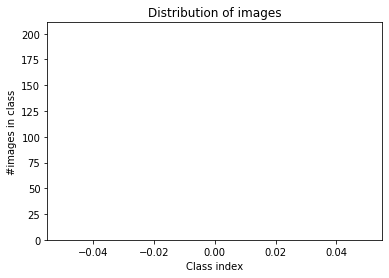

---
# images: 200
# classes: 1

Class with most images: ('Human', 200)
Class with least images: ('Human', 200)

Avg. per class: 200
Mean: 200
---
    Name  Images
0  Human     200
       Images
count     1.0
mean    200.0
std       NaN
min     200.0
25%     200.0
50%     200.0
75%     200.0
max     200.0

CATS DATA OVERVIEW


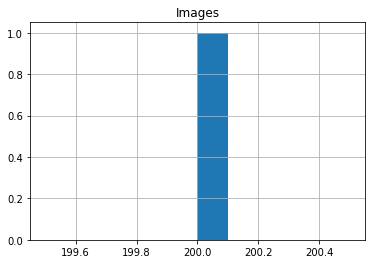

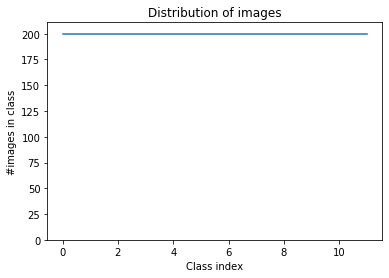

---
# images: 2400
# classes: 12

Class with most images: ('Abyssinian', 200)
Class with least images: ('Abyssinian', 200)

Avg. per class: 200
Mean: 200
---
                 Name  Images
0          Abyssinian     200
1              Bengal     200
2              Birman     200
3              Bombay     200
4   British_shorthair     200
5        Egyptian_Mau     200
6          Maine_Coon     200
7             Persian     200
8             Ragdoll     200
9        Russian_blue     200
10            Siamese     200
11             Sphynx     200
       Images
count    12.0
mean    200.0
std       0.0
min     200.0
25%     200.0
50%     200.0
75%     200.0
max     200.0

DOGS DATA OVERVIEW


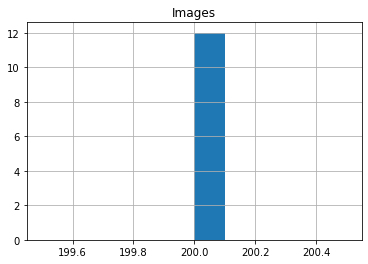

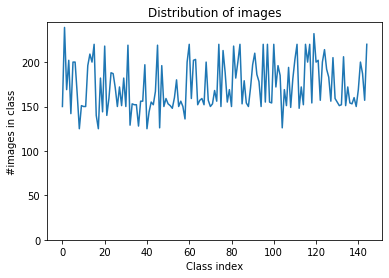

---
# images: 25099
# classes: 145

Class with most images: ('Afghan_hound', 239)
Class with least images: ('Anatolian_shepherd_dog', 125)

Avg. per class: 173
Mean: 173
---
                            Name  Images
0                  Affenpinscher     150
1                   Afghan_hound     239
2            African_hunting_dog     169
3                       Airedale     202
4                          Akita     142
..                           ...     ...
140  West_Highland_white_terrier     169
141              Wheaten_terrier     200
142                      Whippet     187
143      Wire-haired_fox_terrier     157
144            Yorkshire_terrier     220

[145 rows x 2 columns]
           Images
count  145.000000
mean   173.096552
std     27.773220
min    125.000000
25%    152.000000
50%    160.000000
75%    200.000000
max    239.000000



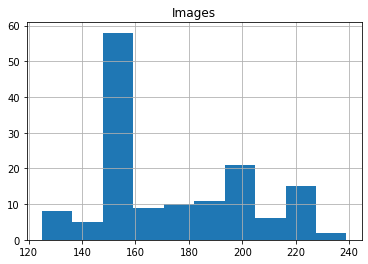

In [24]:
dataPath = 'raw data'
evaluateDataset(dataPath + "/humans", "HUMANS")
evaluateDataset(dataPath + "/cats", "CATS")
evaluateDataset(dataPath + "/dogs", "DOGS")